The car dealership industry in Ghana keeps growing competitive as more and more dealers enter the car dealership business. The competition is worsening the sales performance of many small and mid-size dealerships including Frankot Motors, a car dealeship operating in Ghana. As a management consultant, Frankot Motors has approached us for an insight on how best to price its cars to maximize revenues and profits. As an enthusiast of Python data analytics, we are required to perform exploratory data analysis witht he aim of extracting the features which impact car sales the most and build a predictive model to intelligently guess the sales price of a car based on those important features.


In [147]:
import pandas as pd;

car_sales = pd.read_csv("car_sales.csv")
car_sales.head() # display first 5 rows

,manufact,model,sales,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,Acura,Integra,16.919,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28
1,Acura,TL,39.384,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25
2,Acura,CL,14.114,,3.2,225,106.9,70.6,192,3.47,17.2,26
3,Acura,RL,8.588,42,3.5,210,114.6,71.4,196.6,3.85,18,22
4,Audi,A4,20.397,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27


In [148]:
car_sales.info() # give a description about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   manufact  157 non-null    object 
 1   model     157 non-null    object 
 2   sales     157 non-null    float64
 3   price     157 non-null    object 
 4   engine_s  157 non-null    object 
 5   horsepow  157 non-null    object 
 6   wheelbas  157 non-null    object 
 7   width     157 non-null    object 
 8   length    157 non-null    object 
 9   curb_wgt  157 non-null    object 
 10  fuel_cap  157 non-null    object 
 11  mpg       157 non-null    object 
dtypes: float64(1), object(11)
memory usage: 14.8+ KB


In [149]:
car_sales["price"].value_counts() # view more info about the price

price
18.89     2
          2
38.9      2
12.64     2
24.15     1
         ..
26.935    1
12.885    1
15.35     1
20.55     1
36        1
Name: count, Length: 153, dtype: int64

convert object datas into numerical


In [150]:
numerical_cols = ['price', 'engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']
for col in numerical_cols:
   car_sales[col] = pd.to_numeric(car_sales[col], errors='coerce')

In [151]:
car_sales.describe() # give a description about the data

,sales,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
count,157.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000
mean,52.998076,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.843506
std,68.029422,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282720
min,0.110000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000
25%,14.114000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000
50%,29.450000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000
75%,67.956000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000
max,540.561000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000


In [152]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   manufact  157 non-null    object 
 1   model     157 non-null    object 
 2   sales     157 non-null    float64
 3   price     155 non-null    float64
 4   engine_s  156 non-null    float64
 5   horsepow  156 non-null    float64
 6   wheelbas  156 non-null    float64
 7   width     156 non-null    float64
 8   length    156 non-null    float64
 9   curb_wgt  155 non-null    float64
 10  fuel_cap  156 non-null    float64
 11  mpg       154 non-null    float64
dtypes: float64(10), object(2)
memory usage: 14.8+ KB


## Clean Data


In [153]:
car_sales.isnull().sum() # check for missing values

manufact    0
model       0
sales       0
price       2
engine_s    1
horsepow    1
wheelbas    1
width       1
length      1
curb_wgt    2
fuel_cap    1
mpg         3
dtype: int64

In [154]:
# create a copy of the data without the text attributes
for col in numerical_cols:
    car_sales[col].fillna(car_sales[col].median(), inplace=True)

In [155]:
car_sales.isnull().sum()

manufact    0
model       0
sales       0
price       0
engine_s    0
horsepow    0
wheelbas    0
width       0
length      0
curb_wgt    0
fuel_cap    0
mpg         0
dtype: int64

## Handling Text Categorical Attributes


In [156]:
car_sales_cat = car_sales[['manufact', 'model']]
car_sales_cat.head(10)

,manufact,model
0,Acura,Integra
1,Acura,TL
2,Acura,CL
3,Acura,RL
4,Audi,A4
5,Audi,A6
6,Audi,A8
7,BMW,323i
8,BMW,328i
9,BMW,528i


In [157]:
# convert the categorical data to numbers
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
car_sales_cat_1hot = cat_encoder.fit_transform(car_sales_cat)
car_sales_cat_1hot.toarray() # converting it to dense numpy array

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [158]:
# get list of categories
cat_encoder.categories_

[array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
        'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti',
        'Jaguar', 'Jeep', 'Lexus', 'Lincoln', 'Mercedes-Benz', 'Mercury',
        'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac',
        'Porsche', 'Saab', 'Saturn', 'Subaru', 'Toyota', 'Volkswagen',
        'Volvo'], dtype=object),
 array(['3-Sep', '3000GT', '300M', '323i', '328i', '4Runner', '5-Sep',
        '528i', 'A4', 'A6', 'A8', 'Accent', 'Accord', 'Alero', 'Altima',
        'Aurora', 'Avalon', 'Avenger', 'Beetle', 'Bonneville', 'Boxter',
        'Bravada', 'Breeze', 'C-Class', 'C70', 'CL', 'CL500', 'CLK Coupe',
        'CR-V', 'Cabrio', 'Camaro', 'Camry', 'Caravan',
        'Carrera Cabriolet', 'Carrera Coupe', 'Catera', 'Cavalier',
        'Celica', 'Century', 'Cherokee', 'Cirrus', 'Civic', 'Concorde',
        'Continental', 'Contour', 'Corolla', 'Corvette', 'Cougar',
        'Crown Victoria', 'Cutlass', 'Dakota', 'DeVille', 'Diam

plot the data to have a visual presentation


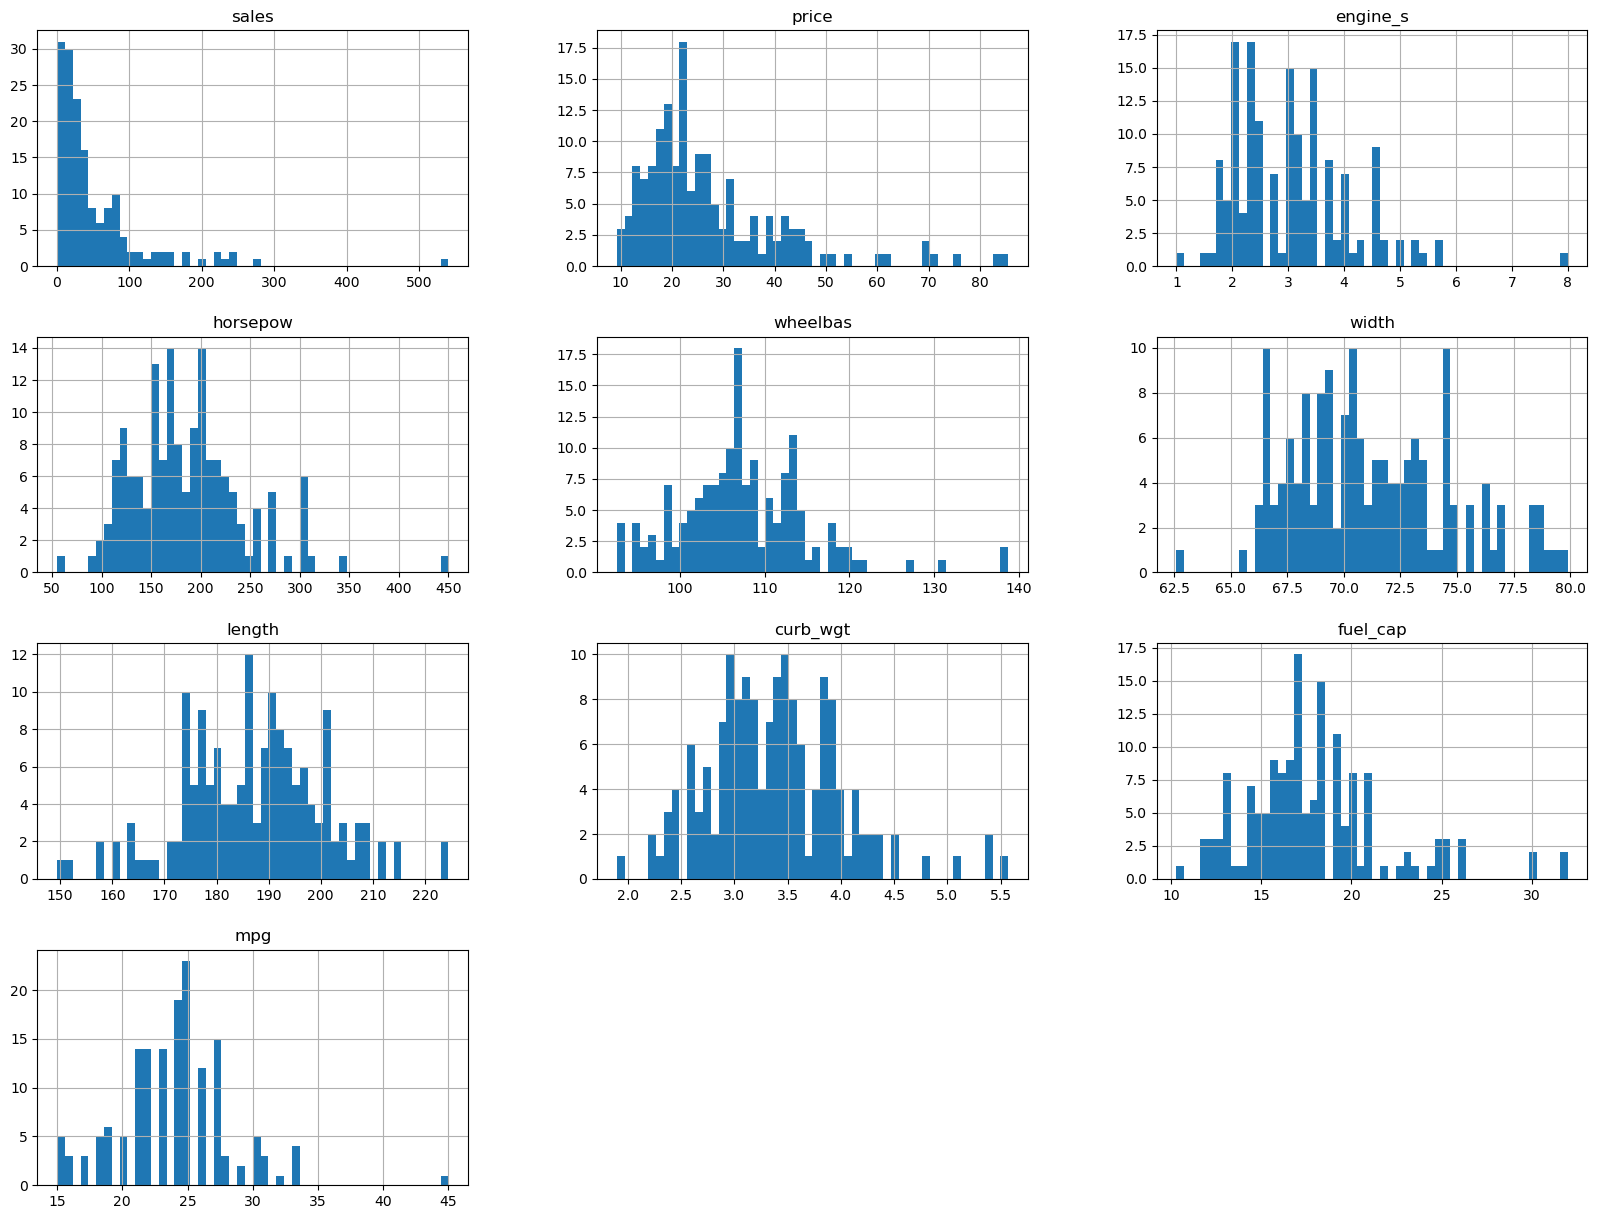

In [159]:
%matplotlib inline
import matplotlib.pyplot as plt 

car_sales.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: xlabel='horsepow', ylabel='price'>

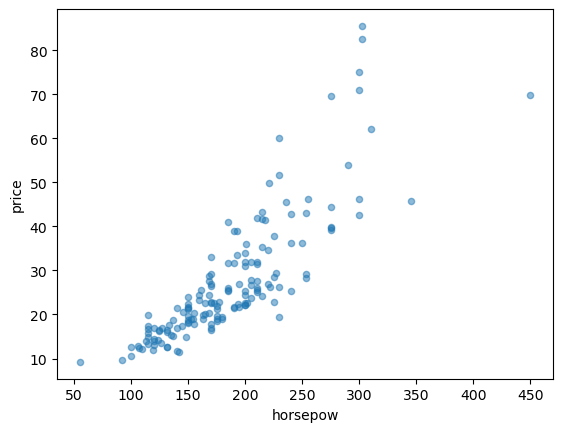

In [160]:
# create a scatter plot
car_sales.plot(kind="scatter", x="horsepow", y="price", alpha=0.5)

In [161]:
car_sales_num = pd.get_dummies(car_sales, columns=["manufact", "model"])
corr_matrix = car_sales_num.corr()
corr_matrix["price"].sort_values(ascending=False)

price                     1.000000
horsepow                  0.836720
engine_s                  0.626264
curb_wgt                  0.522770
manufact_Mercedes-Benz    0.443576
                            ...   
manufact_Volkswagen      -0.135018
manufact_Hyundai         -0.148830
manufact_Saturn          -0.166552
sales                    -0.303049
mpg                      -0.492663
Name: price, Length: 196, dtype: float64

array([[<Axes: xlabel='sales', ylabel='sales'>,
        <Axes: xlabel='price', ylabel='sales'>,
        <Axes: xlabel='engine_s', ylabel='sales'>,
        <Axes: xlabel='horsepow', ylabel='sales'>,
        <Axes: xlabel='wheelbas', ylabel='sales'>,
        <Axes: xlabel='width', ylabel='sales'>,
        <Axes: xlabel='length', ylabel='sales'>,
        <Axes: xlabel='curb_wgt', ylabel='sales'>,
        <Axes: xlabel='fuel_cap', ylabel='sales'>,
        <Axes: xlabel='mpg', ylabel='sales'>],
       [<Axes: xlabel='sales', ylabel='price'>,
        <Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='engine_s', ylabel='price'>,
        <Axes: xlabel='horsepow', ylabel='price'>,
        <Axes: xlabel='wheelbas', ylabel='price'>,
        <Axes: xlabel='width', ylabel='price'>,
        <Axes: xlabel='length', ylabel='price'>,
        <Axes: xlabel='curb_wgt', ylabel='price'>,
        <Axes: xlabel='fuel_cap', ylabel='price'>,
        <Axes: xlabel='mpg', ylabel='price'>],
       [<A

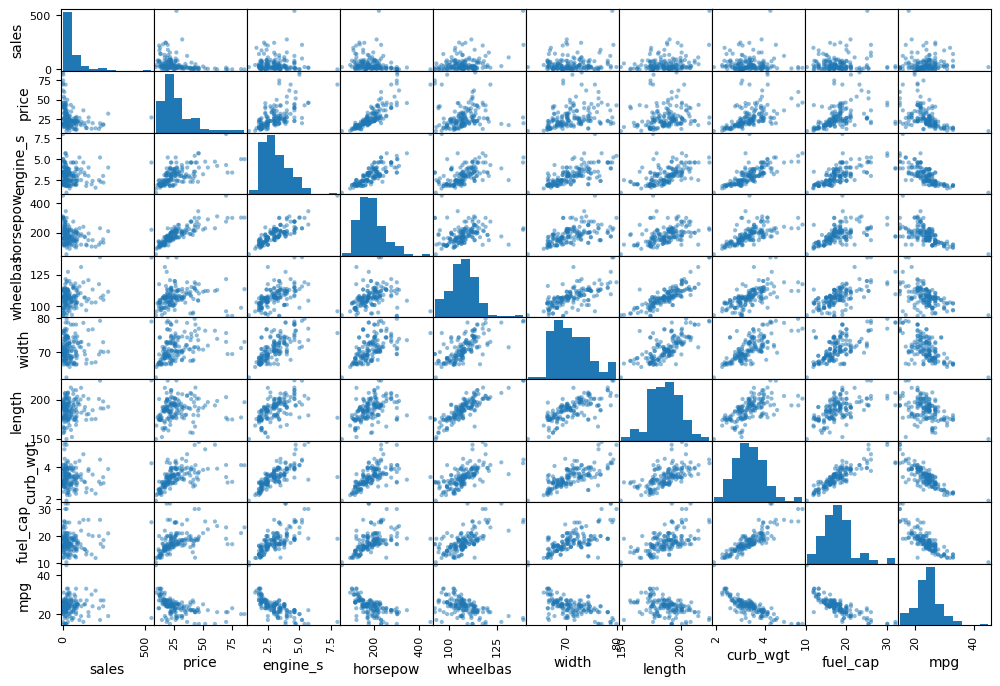

In [162]:
# pandas to analyze correlation
from pandas.plotting import scatter_matrix

num_attribs = [ "sales", "price", "engine_s", "horsepow", "wheelbas", "width", "length", "curb_wgt", "fuel_cap", "mpg"]
scatter_matrix(car_sales[num_attribs], figsize=(12, 8))

### Create a Test Set


In [163]:
import numpy as np
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(car_sales, test_size=0.2, random_state=42)
car_sales = train_set.drop("price", axis=1)
car_sales_labels = train_set["price"].copy()

In [164]:
len(train_set)

125

In [165]:
# pipeline for data transformation
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
      ('imputer', SimpleImputer(strategy='median')),
      ('std_scaler', StandardScaler())
   ])
car_sales_num_tr = num_pipeline.fit_transform(car_sales_num)

In [166]:
# using sklearn-learn ColumnTransformer
from sklearn.compose import ColumnTransformer

num_attribs = [ "sales", "engine_s", "horsepow", "wheelbas", "width", "length", "curb_wgt", "fuel_cap", "mpg"]
cat_attribs = ['manufact', 'model']

full_pipeline = ColumnTransformer([
      ('num', num_pipeline, num_attribs),
      ('cat', OneHotEncoder(handle_unknown="ignore"), cat_attribs)
   ])

car_sales_prepared = full_pipeline.fit_transform(car_sales)

# Select and Train a Model


In [167]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(car_sales_prepared, car_sales_labels)

LinearRegression()

In [168]:
# test the model
some_data = car_sales.iloc[:5]
some_labels = car_sales_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [13.10803841 12.05008314 41.42957428 31.80698034 29.2989987 ]


In [169]:
print("Labels:", list(some_labels))

Labels: [13.108, 12.05, 41.43, 31.807, 29.299]


### Measure model's mean square error


In [170]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(car_sales_prepared)
lin_mse = mean_squared_error(car_sales_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.00013894669319930542

## Use Decision Tree Regressor


In [171]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(car_sales_prepared, car_sales_labels)

DecisionTreeRegressor()

In [172]:
# measure the model
car_sales_predictions = tree_reg.predict(car_sales_prepared)
tree_mse = mean_squared_error(car_sales_labels, car_sales_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Better Evaluation Using Cross Validation


In [173]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, car_sales_prepared, car_sales_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [174]:
# check the scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [ 6.60497261  4.86104355  8.4457561  11.75999768 13.13488956  5.8706344
  7.99231938  9.87079288  8.07635641 10.04527171]
Mean: 8.666203426372606
Standard deviation: 2.4553480470888602


In [175]:
# computet the same scores for the linear regression model
lin_scores = cross_val_score(lin_reg, car_sales_prepared, car_sales_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 6.42243363  4.55452361  5.78094058  4.68618305  5.05373678  6.97536322
  5.31462986  7.37872892  3.69838342 11.14954545]
Mean: 6.101446850838363
Standard deviation: 1.999291622488237


## Fine-Tune the model using grid search


In [176]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_depth': [None, 10, 20, 30, 40], 'min_samples_split': [2, 3, 4]}
]
tree_reg_grid = DecisionTreeRegressor()
grid_search = GridSearchCV(tree_reg_grid, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(car_sales_prepared, car_sales_labels)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [None, 10, 20, 30, 40],
                          'min_samples_split': [2, 3, 4]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [177]:
# display the best hyperparameters
grid_search.best_params_

{'max_depth': None, 'min_samples_split': 4}

In [178]:
# get best estimator
grid_search.best_estimator_

DecisionTreeRegressor(min_samples_split=4)

In [179]:
# evaluate scores
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

7.637656275586116 {'max_depth': None, 'min_samples_split': 2}
7.124643523012222 {'max_depth': None, 'min_samples_split': 3}
7.040402269015284 {'max_depth': None, 'min_samples_split': 4}
7.119578951577824 {'max_depth': 10, 'min_samples_split': 2}
7.054430853628449 {'max_depth': 10, 'min_samples_split': 3}
7.4772288649541006 {'max_depth': 10, 'min_samples_split': 4}
7.859851295794342 {'max_depth': 20, 'min_samples_split': 2}
8.010464954295724 {'max_depth': 20, 'min_samples_split': 3}
7.26525800652209 {'max_depth': 20, 'min_samples_split': 4}
7.901596864938124 {'max_depth': 30, 'min_samples_split': 2}
7.499245285627081 {'max_depth': 30, 'min_samples_split': 3}
7.461288451750288 {'max_depth': 30, 'min_samples_split': 4}
8.009760076306906 {'max_depth': 40, 'min_samples_split': 2}
7.267881359240807 {'max_depth': 40, 'min_samples_split': 3}
7.296713751363235 {'max_depth': 40, 'min_samples_split': 4}


## Analyze the best models and their errors


In [180]:
# display importance scores next to their attribute names
feature_importances = grid_search.best_estimator_.feature_importances_
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[ 1])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.5663115118523121, 'horsepow'),
 (0.3038638207068006, 'sales'),
 (0.04036020621519312, 'curb_wgt'),
 (0.02873017544835473, 'fuel_cap'),
 (0.013567647092495465, 'Breeze'),
 (0.00961199058374607, 'width'),
 (0.008998987458647733, 'Sebring Coupe'),
 (0.006532295595807711, 'A8'),
 (0.006491088257531638, 'wheelbas'),
 (0.006399429078030014, 'engine_s'),
 (0.005556148563201938, 'length'),
 (0.0009741520785986211, 'Avenger'),
 (0.0007627257058360521, '5-Sep'),
 (0.0004461094120229726, 'Xterra'),
 (0.00043725386234883364, '328i'),
 (0.0003679870400693452, 'mpg'),
 (0.00024537740498469966, '4Runner'),
 (5.226745167018278e-05, 'Eldorado'),
 (2.2113679148577017e-06, 'Century'),
 (0.0, 'Wrangler'),
 (0.0, 'Windstar'),
 (0.0, 'Voyager'),
 (0.0, 'Viper'),
 (0.0, 'Villager'),
 (0.0, 'V70'),
 (0.0, 'V40'),
 (0.0, 'Town car'),
 (0.0, 'Town & Country'),
 (0.0, 'Taurus'),
 (0.0, 'Tacoma'),
 (0.0, 'TL'),
 (0.0, 'Sunfire'),
 (0.0, 'Stratus'),
 (0.0, 'Sonata'),
 (0.0, 'Silhouette'),
 (0.0, 'Sienna'),
 (0

## Evaluate System on the Test Set


In [181]:
final_model = grid_search.best_estimator_

x_test = test_set.drop("price", axis=1)
y_test = test_set["price"].copy()

x_test_prepared = full_pipeline.transform(x_test)
final_predictions = final_model.predict(x_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

11.809212517405637